In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# from google.colab import drive




In [100]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...


True

In [13]:
lemmatizer = WordNetLemmatizer()


In [15]:
with open('/content/drive/MyDrive/stop_words', 'r') as file:
    custom_stop_words = set(lemmatizer.lemmatize(line.strip()) for line in file if line.strip())


In [17]:
with open('data/stop_words', 'r') as file:
    custom_stop_words = set(lemmatizer.lemmatize(line.strip()) for line in file if line.strip())

In [102]:
IMDB = pd.read_csv('data/IMDB Dataset.csv')

# IMDB = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [101]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


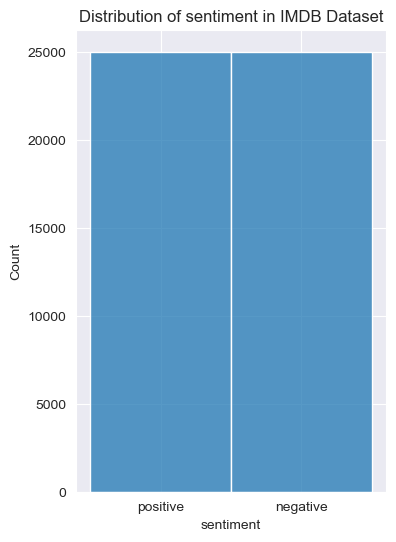

In [104]:
plt.figure(figsize=(4, 6))
sns.histplot(IMDB['sentiment'], bins=3)
plt.title("Distribution of sentiment in IMDB Dataset")
plt.xlabel("sentiment")
plt.ylabel("Count")
# plt.xticks(ticks=IMDB['sentiment'].unique(), labels=IMDB['sentiment'].unique())

plt.show()

Бачимо що розподіл добрий
та що маємо 2 таргета


In [91]:
def preprocess_text(text):
    """видалення HTML, видалення URL, видалення шляхів до файлів"""
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub(r'(?:[A-Za-z]:\\|[/\\])\S+', '', text)
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def custom_tokenizer(text):
    """токенізація та лематизація"""
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [20]:
IMDB['sentiment'] = IMDB['sentiment'].map({'positive': 1, 'negative': 0})
IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [99]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


sentiment нормально перетворенний пропусків нема

In [22]:
X = IMDB['review']
y = IMDB['sentiment']
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


BOW

In [92]:

bow_vectorizer = CountVectorizer(
    preprocessor=preprocess_text,
    tokenizer=custom_tokenizer,
    stop_words=list(custom_stop_words),
    max_features=5000,
    lowercase=True,
    token_pattern=None,
)


In [93]:
X_train_bow = bow_vectorizer.fit_transform(X_train_text)
X_test_bow = bow_vectorizer.transform(X_test_text)

C:\Users\Alex\AppData\Local\Temp\ipykernel_14240\4177468550.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [89]:
model_bow = LogisticRegression(max_iter=1000, random_state=42)
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

In [90]:
print("Точність BOW:", accuracy_score(y_test, y_pred_bow))
print("Звіт по класифікації BOW:\n", classification_report(y_test, y_pred_bow))

Точність BOW: 0.8728
Звіт по класифікації BOW:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



TF-IDF

In [94]:

tfidf_vectorizer = TfidfVectorizer(
    preprocessor=preprocess_text,
    tokenizer=custom_tokenizer,
    stop_words=list(custom_stop_words),
    # max_features=10000,
    lowercase=True,
    token_pattern=None
)

In [95]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

C:\Users\Alex\AppData\Local\Temp\ipykernel_14240\4177468550.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [96]:
model_tfidf = LogisticRegression(max_iter=1000, random_state=42)
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [97]:
print("Точність TF-IDF:", accuracy_score(y_test, y_pred_tfidf))
print("Звіт по класифікації TF-IDF:\n", classification_report(y_test, y_pred_tfidf))

Точність TF-IDF: 0.8958
Звіт по класифікації TF-IDF:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [98]:
dt_model = KNeighborsClassifier(n_neighbors=5)
dt_model.fit(X_train_tfidf, y_train)
y_pred_tf = dt_model.predict(X_test_tfidf)
print("Точність TF-IDF:", accuracy_score(y_test, y_pred_tf))
print("Звіт по класифікації TF-IDF:\n", classification_report(y_test, y_pred_tf))

Точність TF-IDF: 0.753
Звіт по класифікації TF-IDF:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77      4961
           1       0.79      0.69      0.74      5039

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



По резулбтатам тренуваня моделей можна зробити такі висновки.
TF-IDF працює краще ніж BOW причому рожширеня словніка покращює результати тож обмежувати його має сенс тільки якщо боремось за пам'ять. Також бачимо що LogisticRegression все ще залишається лідером у якості прогнозування.